# Тестовое задание на позицию Junior Analyst
## Часть 2. Техническое задание
В файле «data.xlsx» представлены данные по поступлению денежных средств от клиентов компании N за покупку ее услуг.

### Описание данных
- `client_id` - ID клиента;
- `sum` – сумма денежных средств;
- `status` – статус оплаты;
- `sale` – менеджер, заключивший сделку;
- `new/current` – статус сделки;
- `document` – наличие оригинала подписанного договора с клиентом;
- `receiving_date` – дата получения оригинала договора

### Получение и предобработка данных

In [1]:
# необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# данные
data = pd.read_excel('data.xlsx')
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


Сначала необходимо привести данные в минимальный порядок. В частности, перенести наименование отчетного периода (месяц год) из столбца *status* в пустующую колонку *Unnamed: 5*. Но перед этим ее необходимо переименовать:

In [4]:
data = data.rename(columns={'Unnamed: 5': 'period'})

Выделить информацию о периоде из столбца *status* можно по столбцу *client_id*. Пропуски в нем содержатся только в нужных строках.

In [5]:
data.query('client_id.isnull()')

,client_id,sum,status,sale,new/current,period,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN,NaN
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN,NaN
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN,NaN


In [6]:
# выделение информации о периоде из *status* в *period*
data.loc[0:129, 'period'] = data.loc[0:129, 'period'].fillna('Май 2021')
data.loc[129:258, 'period'] = data.loc[129:258, 'period'].fillna('Июнь 2021')
data.loc[258:369, 'period'] = data.loc[258:369, 'period'].fillna('Июль 2021')
data.loc[369:484, 'period'] = data.loc[369:484, 'period'].fillna('Август 2021')
data.loc[484:594, 'period'] = data.loc[484:594, 'period'].fillna('Сентябрь 2021')
data.loc[594:730, 'period'] = data.loc[594:730, 'period'].fillna('Октябрь 2021')

In [7]:
# удаление ненужных строк
data = data.dropna(subset=['client_id'])
data.head()

,client_id,sum,status,sale,new/current,period,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,Май 2021,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,Май 2021,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-07-07 00:00:00


Следующий этап предобработки - поиск и замена пропусков. 

In [8]:
data.isnull().sum()

client_id           0
sum                 0
status              0
sale                0
new/current         0
period              0
document           15
receiving_date    117
dtype: int64

Пропущенные значения присутствуют в столбцах *document* и *receiving_date*. 

In [9]:
# пропуск или там, или там (пример)
data.query('receiving_date.isnull() or document.isnull()').sample(5)

,client_id,sum,status,sale,new/current,period,document,receiving_date
636,357.0,3753.7,ОПЛАЧЕНО,Михайлов,текущая,Октябрь 2021,НЕТ,NaN
626,370.0,11453.7,НА ПОДПИСАНИИ,Андреев,новая,Октябрь 2021,НЕТ,NaN
508,49.0,7203.7,ОПЛАЧЕНО,Петрова,текущая,Сентябрь 2021,НЕТ,NaN
687,355.0,10358.0,ПРОСРОЧЕНО,Смирнов,новая,Октябрь 2021,НЕТ,NaN
690,228.0,1603.7,ОПЛАЧЕНО,Смирнов,текущая,Октябрь 2021,NaN,NaN


In [10]:
# уникальные значения в столбце *document* при пропуске даты
data.query('receiving_date.isnull() and not document.isnull()')['document'].unique()

array(['НЕТ'], dtype=object)

In [11]:
# пропуск и там, и там
data.query('receiving_date.isnull() and document.isnull()')

,client_id,sum,status,sale,new/current,period,document,receiving_date
459,256.0,2351.2,ОПЛАЧЕНО,Филимонова,текущая,Август 2021,NaN,NaN
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,Сентябрь 2021,NaN,NaN
689,228.0,6393.7,ОПЛАЧЕНО,Смирнов,текущая,Октябрь 2021,NaN,NaN
690,228.0,1603.7,ОПЛАЧЕНО,Смирнов,текущая,Октябрь 2021,NaN,NaN


Встречается три варианта: 
- пропуск в *receiving_date*, но есть значение 'НЕТ' в *document*
- пропуск в *document*, но есть значение в *receiving_date*
- пропуск и в том, и в другом столбце

При этом, в первом варианте пропуск выглядит логично, так как оригинал договора просто не предоставлен. Эти значения заполнять не надо. 

Во втором варианте указана дата получения оригинала договора, но не указано, предоставлен ли оригинал. В данном случае пропуски в *document* следует заменить на 'оригинал'. 

В третьем варианте не указано ни то, ни другое. Таких строки всего 4 и все они имеют "текущий" тип сделки. Заменить пропуски в данном случае логичным значением не получится.

In [12]:
# замена по второму варианту
data.loc[~data['receiving_date'].isnull(), 'document'] = (
    data.loc[~data['receiving_date'].isnull(), 'document'].fillna('оригинал')
)

Также следует заменить значения "-", также являющиеся пропусками, в первой строке на NaN.

In [13]:
data = data.replace('-', np.nan)
data.head()

,client_id,sum,status,sale,new/current,period,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,Май 2021,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,Май 2021,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-07-07


Наконец, для упрощения проведения анализа следует привести столбцы *client_id* и *receiving_date* к ожидаемым типам данных:

In [14]:
data['client_id'] = data['client_id'].astype('int')
data['receiving_date'] = pd.to_datetime(data['receiving_date'])

In [15]:
data.head()

,client_id,sum,status,sale,new/current,period,document,receiving_date
1,6,11693.7,ВНУТРЕННИЙ,NaN,NaN,Май 2021,NaN,NaT
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,Май 2021,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-06-08
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,Май 2021,оригинал,2021-07-07


Теперь с данными можно работать.

### Ответы на вопросы

1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [16]:
# уникальные значения столбца status
data['status'].unique()

array(['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ',
       'НА ПОДПИСАНИИ'], dtype=object)

In [17]:
print('Ответ:', end=' ')
print(data.query('status != "ПРОСРОЧЕНО" and period == "Июль 2021"')['sum'].sum().round(1))

Ответ: 859896.5


2. Как изменялась выручка компании за рассматриваемый период?Проиллюстрируйте графиком.

Рассматриваемый период: с Мая 2021 по Октябрь 2021 (все статусы сделки)

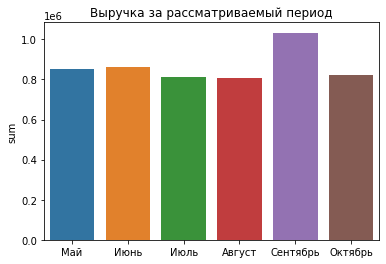

In [18]:
x = ['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь']
y = data.groupby('period')['sum'].sum()

sns.barplot(x=x, y=y)
plt.title('Выручка за рассматриваемый период')
plt.show()

Ежемесячная выручка в течение почти всего рассматриваемого периода находилась примерно на одном уровне, за исключением сентября 2021. Там наблюдался резкий скачок вверх.

3. Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [19]:
data.query('period == "Сентябрь 2021"').groupby('sale')['sum'].sum().sort_values(ascending=False)

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: sum, dtype: float64

**Ответ**: Смирнов

4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [20]:
data.query('period == "Октябрь 2021"').groupby('new/current')['client_id'].count()

new/current
новая      36
текущая    99
Name: client_id, dtype: int64

**Ответ**: текущий тип

5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Для упрощения расчетов можно выделить месяц получения оригинала договора в отдельный столбце *receiving_month*.

In [21]:
# в новом столбце месяцы записаны номером от 1 до 12
data['receiving_month'] = data['receiving_date'].dt.month

In [22]:
print('Ответ:', end=' ')
print(data.query('receiving_month == 6 and period == "Май 2021"')['client_id'].count())

Ответ: 77


Ответ дан с предположением, что одна строка отражает одну сделку.

### Решение задания

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

1. За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2. За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. 

Вычислите остаток каждого из менеджеров на 01.07.2021

Для рассмотрения подходят периоды "Май 2021" и "Июнь 2021". Также для решения задачи создадим новый столбец *bonus_sum*, куда будет заноситься доп.сумма, которую получает менеджер за сделку. 

In [23]:
# для проверки соответствия месяца прихода оригиналов
def right_month(period, month_number):
    if period == 'Май 2021' and month_number in [5, 6]: return True
    if period == 'Июнь 2021' and month_number == 6: return True
    
    return False

In [24]:
# ф-ция определяет бонус менеджера со сделки
def define_manager_bonus(row):
    deal_type = row['new/current']
    status = row['status']
    period_month = row['period']
    doc_month = row['receiving_month']
    deal_sum = row['sum']
    
    is_new = (
        deal_type == 'новая' and 
        right_month(period_month, doc_month) and
        status == 'ОПЛАЧЕНО'
    )
    
    is_current = (
        deal_type == 'текущая' and
        right_month(period_month, doc_month) and
        status != 'ПРОСРОЧЕНО'
    )
    
    # если сделка новая
    if is_new:
        return 0.07*deal_sum
    
    # если сделка текущая
    if is_current and deal_sum > 10000:
        return 0.05*deal_sum
    if is_current:
        return 0.03*deal_sum
    
    return

In [25]:
# создание нового столбца
data['bonus_sum'] = data.apply(define_manager_bonus, axis=1)

In [26]:
# расчет остатка каждого из менеджеров
data.groupby('sale')['bonus_sum'].sum().sort_values()

sale
Михайлов         0.0000
Попов            0.0000
Соколов          0.0000
Васильев       339.2310
Селиванов      353.3220
Филимонова     409.6830
Иванов        2503.8390
Кузнецова     2604.6716
Андреев       4657.5427
Смирнов       4775.1330
Петрова       7028.8020
Name: bonus_sum, dtype: float64

Самый большой бонус со сделок за этот период скопила менеджер по фамилии Петрова.